# Pattern Recognition

# Lucas Nogueira Ribeiro

## First exercise: covariance matrices

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pylab as pl
import scipy as sc

mu = np.array([[3.0],[1.0],[2.0]])
mu.shape = (3,1) # Force mu to be a column vector

K = np.array([[0.5, 0.2, 0.1],
              [0.6, 0.18, 0.4],
              [0.1, 0.6, 0.2]])

x = np.array([[0],[0.5], [1]])
x.shape = (3,1)

### Util functions

In [3]:
def getPartitions(M):
    if not isinstance(M, np.ndarray):
        raise TypeError('The input argument must be a numpy.ndarray')
    
    if M.shape == (3,3):
        Maa = M[0:2, 0:2]
        Mbb = M[2,2]
        Mab = M[0:2,2]
        Mba = M[2,0:2]

        # Force Mab and Mba to be column and row vectors
        Mab.shape = (2,1)
        Mba.shape = (1,2)

        return Maa, Mbb, Mab, Mba
    elif M.shape == (3,1):
        Ma = M[0:2]
        Mb = M[2]

        # Force Ma to be a column vector
        Ma.shape = (2,1)

        return Ma, Mb
    else:
        raise Exception('The input argument must be a 3x3 or 3x1 matrix')

def getPrecision(C):
    return np.linalg.inv(C)

def getCondCov(C):
    Caa, Cbb, Cab, Cba = getPartitions(C)
    iCbb = 1.0/Cbb
    return Caa - np.dot(Cab, np.dot(iCbb, Cba))

def getCondMean(C, mu, x):
    mu_a, mu_b = getPartitions(mu)  
    xa, xb = getPartitions(x)
    Caa, Cbb, Cab, Cba = getPartitions(C)
    iCbb = 1.0/Cbb
    
    aux = np.dot(np.dot(Cab, iCbb),(xb - mu_b))
    aux.shape = (2,1)
    
    return mu_a + aux

def getCondProb(x, C):
    xa, xb = getPartitions(x)
    ma, mb = getPartitions(mu)
    P = getPrecision(C)
    Paa, Pbb, Pab, Pba = getPartitions(P)
    
    e_aa = -0.5*np.dot((xa - ma).T, np.dot(Paa, (xa - ma)))
    e_ab = -0.5*np.dot((xa - ma).T, np.dot(Pab, (xb - mb)))
    e_ba = -0.5*np.dot((xb - mb).T, np.dot(Pba, (xa - ma)))
    e_bb = -0.5*np.dot((xb - mb).T, np.dot(Pbb, (xb - mb)))
    
    e = np.exp(e_aa + e_ab + e_ba + e_bb)
    f = 1.0/(2*np.pi*np.sqrt(np.linalg.det(C)))
    
    return f*e
        
def printInfo(C, x, mu):
    print C
    
    # Calculate the partitions of the covariance matrix
    Caa, Cbb, Cab, Cba = getPartitions(C)
    print 'Caa:'
    print Caa
    print 'Cbb:'
    print Cbb
    print 'Cab:'
    print Cab
    print 'Cba:'
    print Cba
    print

    # Calculate the partitions of the precision matrix
    P = getPrecision(C)
    print 'Precision matrix (P):'
    print P
    Paa, Pbb, Pab, Pba = getPartitions(P)
    print 'Paa:'
    print Paa
    print 'Pbb:'
    print Pbb
    print 'Pab:'
    print Pab
    print 'Pba:'
    print Pba
    print 
    
    # Calculate the conditional covariance matrix
    condC = getCondCov(C)
    print 'condC:'
    print condC

    # Calculate the partitions of the mean vector
    mu_a, mu_b = getPartitions(mu)
    print 'mu:'
    print mu
    print 'mu_a:'
    print mu_a
    print 'mu_b:'
    print mu_b
    print 'x:'
    print x
    print
    
    # Calculate the conditional mean vector
    condMean = getCondMean(C, mu, x)
    print 'condMean:'
    print condMean

    # Calculate the probability 
    prob = getCondProb(x, C)
    print 'prob: ', prob    

### First covariance matrix

In [4]:
# Build covariance matrix
k = 4.0
C1 = k * np.eye(3)

print 'C1:'
printInfo(C1, x, mu)

C1:
[[ 4.  0.  0.]
 [ 0.  4.  0.]
 [ 0.  0.  4.]]
Caa:
[[ 4.  0.]
 [ 0.  4.]]
Cbb:
4.0
Cab:
[[ 0.]
 [ 0.]]
Cba:
[[ 0.  0.]]

Precision matrix (P):
[[ 0.25  0.    0.  ]
 [ 0.    0.25  0.  ]
 [ 0.    0.    0.25]]
Paa:
[[ 0.25  0.  ]
 [ 0.    0.25]]
Pbb:
0.25
Pab:
[[ 0.]
 [ 0.]]
Pba:
[[ 0.  0.]]

condC:
[[ 4.  0.]
 [ 0.  4.]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
x:
[[ 0. ]
 [ 0.5]
 [ 1. ]]

condMean:
[[ 3.]
 [ 1.]]
prob:  [[ 0.00552447]]


### Second covariance matrix

In [5]:
# Build covariance matrix
C2 = np.dot(K, K.T)
print 'C2:'

printInfo(C2, x, mu)

C2:
[[ 0.3     0.376   0.19  ]
 [ 0.376   0.5524  0.248 ]
 [ 0.19    0.248   0.41  ]]
Caa:
[[ 0.3     0.376 ]
 [ 0.376   0.5524]]
Cbb:
0.41
Cab:
[[ 0.19 ]
 [ 0.248]]
Cba:
[[ 0.19   0.248]]

Precision matrix (P):
[[ 23.49325875 -15.24256526  -1.66722678]
 [-15.24256526  12.37461623  -0.42150592]
 [ -1.66722678  -0.42150592   3.46660135]]
Paa:
[[ 23.49325875 -15.24256526]
 [-15.24256526  12.37461623]]
Pbb:
3.46660135224
Pab:
[[-1.66722678]
 [-0.42150592]]
Pba:
[[-1.66722678 -0.42150592]]

condC:
[[ 0.21195122  0.26107317]
 [ 0.26107317  0.40239024]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
x:
[[ 0. ]
 [ 0.5]
 [ 1. ]]

condMean:
[[ 2.53658537]
 [ 0.39512195]]
prob:  [[  1.36126245e-35]]


### Thrid covariance matrix

In [6]:
# Build covariance matrix
C3 = np.zeros((3,3))

d = np.diag(C2)

for n in range(3):
    C3[n,n] = d[n]

printInfo(C3, x, mu)

[[ 0.3     0.      0.    ]
 [ 0.      0.5524  0.    ]
 [ 0.      0.      0.41  ]]
Caa:
[[ 0.3     0.    ]
 [ 0.      0.5524]]
Cbb:
0.41
Cab:
[[ 0.]
 [ 0.]]
Cba:
[[ 0.  0.]]

Precision matrix (P):
[[ 3.33333333  0.          0.        ]
 [ 0.          1.8102824   0.        ]
 [ 0.          0.          2.43902439]]
Paa:
[[ 3.33333333  0.        ]
 [ 0.          1.8102824 ]]
Pbb:
2.43902439024
Pab:
[[ 0.]
 [ 0.]]
Pba:
[[ 0.  0.]]

condC:
[[ 0.3     0.    ]
 [ 0.      0.5524]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
x:
[[ 0. ]
 [ 0.5]
 [ 1. ]]

condMean:
[[ 3.]
 [ 1.]]
prob:  [[  4.39968555e-08]]


## Second exercise: covariance matrices

In [7]:
def gauss(x, mu, sig):
    return 1.0/(sig*np.sqrt(2*np.pi))*np.exp((-1.0/(2.0*sig**2))*(x-mu)**2.0)

### First covariance matrix

In [8]:
Caa, Cbb, Cab, Cba = getPartitions(C1)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

print xb
print gauss(xb, mb, Cbb)
print mb
print Cbb

[ 1.]
[ 0.09666703]
[ 2.]
4.0


### Second covariance matrix

In [9]:
Caa, Cbb, Cab, Cba = getPartitions(C2)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

print gauss(xb, mb, Cbb)
print mb
print Cbb

[ 0.0496995]
[ 2.]
0.41


### Third covariance matrix

In [10]:
Caa, Cbb, Cab, Cba = getPartitions(C3)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

print gauss(xb, mb, Cbb)
print mb
print Cbb

[ 0.0496995]
[ 2.]
0.41


## Third exercise:  Student's t distribution

In [11]:
from scipy.special import gamma

def student(x, mu, lamb, upsilon):
    g = gamma(upsilon/2.0 + 0.5)/gamma(upsilon/2.0)
    l = np.sqrt(lamb/(np.pi*upsilon))
    f = (1 + (lamb*(x-mu)**2.0)/upsilon)**(-upsilon/2.0-0.5)
    return g*l*f

def plotDistribution(mu, lamb, sigma):
    t = np.linspace(-10.0, 10.0, 1000)
    upsilon_style_list = [(0.01,'r'), (0.1,'g'), (1, 'b'), (10,'k'), (100, 'm')]

    pl.figure()

    # plot student distributions
    for upsilon, style in upsilon_style_list:
        y = [ student(x, mu, lamb, upsilon) for x in t]
        pl.plot(t, y, style)

    # plot gaussian distribution    
    g = [ gauss(x, mu, sigma) for x in t]
    pl.plot(t, g, '--k')

    # configure figure
    pl.xlabel('$x$', fontsize=12)
    pl.ylabel('St[$x,\mu,\lambda,\upsilon$]', fontsize=12)
    pl.title('$\mu$ = {}, $\lambda$ = {}, $\sigma$ = {}'.format(mu, lamb, sigma), fontsize=12)
    pl.legend(['$\upsilon$ = 0.01',
              '$\upsilon$ = 0.1',
              '$\upsilon$ = 1',
              '$\upsilon$ = 10',
              '$\upsilon$ = 100',
              'Gaussian ($\sigma$ = 1)'], fontsize=10)    

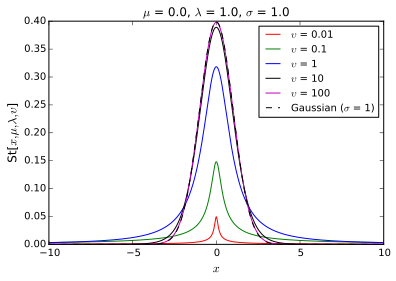

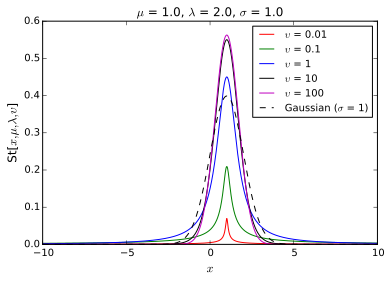

In [12]:
plotDistribution(0.0, 1.0, 1.0)
pl.savefig('./figures/3f1.eps', format='eps', dpi=1000)   

plotDistribution(1.0, 2.0, 1.0)
pl.savefig('./figures/3f2.eps', format='eps', dpi=1000)   

## Fourth exercise: mixture of gaussians

In [13]:
def gmm(k, weights, means):
    if weights.sum() != 1.0:
        raise Exception('a soma deve ser 1.0')
        
    val = 0.0        
    for n in range(weights.size):
        val += weights[n] * gauss(k, means[n], 1.0)
    
    return val      

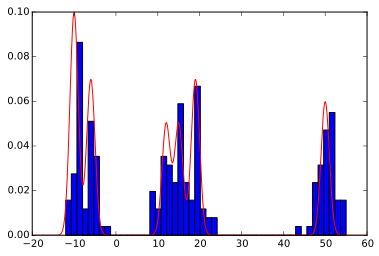

In [14]:
x = np.loadtxt('03_Assignment_data/03_Assignment_data-B.txt')

interval = np.linspace(-20, 60, 1000)
weights = np.array([0.25, 0.175, 0.125, 0.125, 0.175, 0.15])
means = np.array([-10, -6, 12, 15, 19, 50])
mixture = [ gmm(k, weights, means) for k in interval]

pl.figure()
n, bins, patches = pl.hist(x, bins=50, normed=True)
pl.plot(interval, mixture, 'r')
pl.savefig('./figures/4f1.eps', format='eps', dpi=1000)   

## Fifth exercise: Kernel density estimators

In [15]:
def parzenkernel(k, xn, h):
    if np.abs((k-xn)/h) <= 0.5:
        return 1.0/h
    else:
        return 0.0
    
def gausskernel(k, xn, h):
    return (1.0/(h*np.sqrt(2*np.pi)))*np.exp(-(np.abs(k-xn)**2.0)/(2*h**2))
    
    
def kde(interval, x, h, method):
    T = interval.size
    N = x.size
    
    pdf = np.zeros((T,))
    for t in range(T):
        k = interval[t] # probe value
        
        pdf[t] = 0.0
        if method == 'parzen':
            for n in range(N):
                xn = x[n]
                pdf[t] += parzenkernel(k, xn, h)/N
        elif method == 'gauss':
            for n in range(N):
                xn = x[n]
                pdf[t] += gausskernel(k, xn, h)/N
        else:
            raise ValueError('Invalid argument method.')

    return pdf

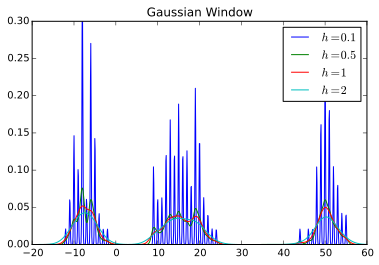

In [38]:
x = np.loadtxt('03_Assignment_data/03_Assignment_data-B.txt')

h_list = [0.1, 0.5, 1, 2]
interval = np.linspace(-20, 60, 1000)

pl.figure()
for h in h_list:
    pdf = kde(interval, x, h, 'gauss')
    pl.plot(interval, pdf)

pl.title('Gaussian Window')
pl.legend(['$h=0.1$', '$h=0.5$', '$h=1$', '$h=2$'])
pl.ylim([0, 0.30])
pl.savefig('./figures/5f1.eps', format='eps', dpi=1000)   

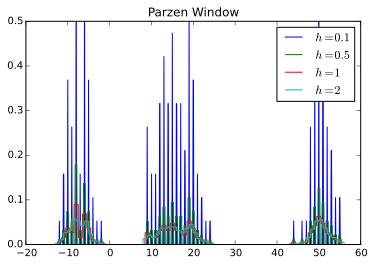

In [37]:
pl.figure()
for h in h_list:
    pdf = kde(interval, x, h, 'parzen')
    pl.plot(interval, pdf)

pl.title('Parzen Window')
pl.legend(['$h=0.1$', '$h=0.5$', '$h=1$', '$h=2$'])
pl.ylim([0, 0.50])
pl.savefig('./figures/5f2.eps', format='eps', dpi=1000)   

## Sixth exercise

In [18]:
x_learning_input = np.loadtxt('03_Assignment_data/03_Assignment_data-C-learning-input.txt')
x_validation_input = np.loadtxt('03_Assignment_data/03_Assignment_data-C-validation-input.txt')
x_test_input = np.loadtxt('03_Assignment_data/03_Assignment_data-C-test-input.txt')

x_learning_output = np.loadtxt('03_Assignment_data/03_Assignment_data-C-learning-output.txt')
x_validation_output = np.loadtxt('03_Assignment_data/03_Assignment_data-C-validation-output.txt')
x_test_output = np.loadtxt('03_Assignment_data/03_Assignment_data-C-test-output.txt')

In [19]:
def mse(y, t):
    error = y - t
    squared_error = np.abs(error)**2.0
    N = y.shape[0]
    return (1.0/N)*squared_error.sum()

def gaussbf(xn, mu):
    return np.exp(-0.5*np.linalg.norm(xn - mu)**2.0)

def gausslearn(x, t, M):     
    N = x.shape[0]         # number of samples
    ones = np.ones((N,1))
    Sig = np.zeros((N,M))  # initialize design matrix
    for m in range(M): 
        mu = x[m,:]  
        for n in range(N):
            xn = x[n,:]
            Sig[n,m] = gaussbf(xn, mu)
            
    Sig = np.concatenate((ones, Sig), axis=1)
    w = np.dot(np.linalg.pinv(Sig), t)
    y = np.dot(Sig, w)
    return y, w

def lslearn(x, t):
    N = x.shape[0]
    ones = np.ones((N,1)) # bias elements
    Sig = np.concatenate((ones, x), axis=1)
    w = np.dot(np.linalg.pinv(Sig), t)
    y = np.dot(Sig, w)
    return y, w

### Classic least-squares (identity)

#### Test

MSE [learning]:  1.03728146352
MSE [test]:  1.10867871973


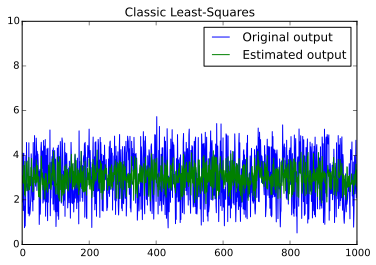

In [20]:
t_learning = x_learning_output
t_test = x_test_output

(y_learning, w_learning) = lslearn(x_learning_input, t_learning)
(y_test, w_test) = lslearn(x_test_input, t_test)

print 'MSE [learning]: ', mse(y_learning, t_learning)
print 'MSE [test]: ', mse(y_test, t_test)

pl.figure()
pl.plot(t_test)
pl.plot(y_test)
pl.legend(('Original output', 'Estimated output'))
pl.ylim([0, 10])
pl.title('Classic Least-Squares')
pl.savefig('./figures/6f1.eps', format='eps', dpi=1000)   

### Gaussian basis function

#### Find the optimum basis function number

In [21]:
M_list = range(2, 70, 4)
MSE_list = []
norm_list = []
t = x_validation_output
for M in M_list:
    print 'M = {}...'.format(M)
    (y, w) = gausslearn(x_validation_input, t, M)
    MSE_list.append(mse(y,t))
    norm_list.append(np.linalg.norm(w))

M = 2...
M = 6...
M = 10...
M = 14...
M = 18...
M = 22...
M = 26...
M = 30...
M = 34...
M = 38...
M = 42...
M = 46...
M = 50...
M = 54...
M = 58...
M = 62...
M = 66...


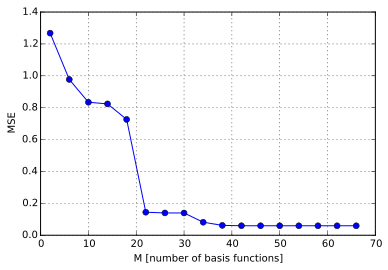

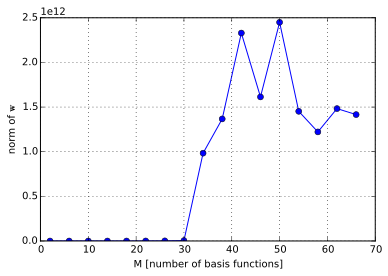

In [22]:
pl.figure()
pl.plot(M_list, MSE_list, '-o')
pl.xlabel('M [number of basis functions]')
pl.ylabel('MSE')
pl.grid()    
pl.savefig('./figures/6f2.eps', format='eps', dpi=1000)   


pl.figure()
pl.plot(M_list, norm_list, '-o')
pl.xlabel('M [number of basis functions]')
pl.ylabel('norm of $\mathbf{w}$')
pl.grid()
pl.savefig('./figures/6f3.eps', format='eps', dpi=1000)   

#### Test

MSE [learning]:  0.064172108973
MSE [test]:  0.05952864372


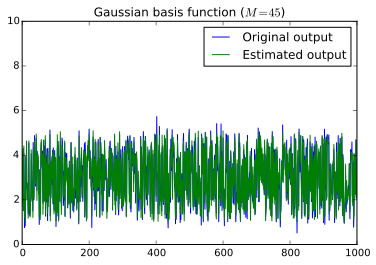

In [23]:
M = 45

t_learning = x_learning_output
t_test = x_test_output

(y_learning, w_learning) = gausslearn(x_learning_input, t_learning, M)
(y_test, w_test) = gausslearn(x_test_input, t_test, M)

print 'MSE [learning]: ', mse(y_learning, t_learning)
print 'MSE [test]: ', mse(y_test, t_test)

pl.figure()
pl.plot(t_test)
pl.plot(y_test)
pl.legend(('Original output', 'Estimated output'))
pl.ylim([0, 10])
pl.title('Gaussian basis function ($M={}$)'.format(M))
pl.savefig('./figures/6f4.eps', format='eps', dpi=1000)   

## Seventh exercise

In [24]:
def gausslearnreg(x, t, M, lamb):     
    N = x.shape[0]         # number of samples
    ones = np.ones((N,1))
    Sig = np.zeros((N,M))  # initialize design matrix
    for m in range(M): 
        mu = x[m,:]  
        for n in range(N):
            xn = x[n,:]
            Sig[n,m] = gaussbf(xn, mu)
            
    Sig = np.concatenate((ones, Sig), axis=1)
        
    identity = np.eye(M+1)
    pinv = np.dot(np.linalg.inv(lamb*identity + np.dot(Sig.T, Sig)), Sig.T)
    
    w = np.dot(pinv, t)
    y = np.dot(Sig, w)
    return y, w

In [25]:
M = 45
lamb_list = [0, 0.01, 0.1, 1, 10, 100]
MSE_list = []
norm_list = []
t = x_validation_output
for lamb in lamb_list:
    print 'Lambda = {}...'.format(lamb)
    (y, w) = gausslearnreg(x_validation_input, t, M, lamb)
    MSE_list.append(mse(y,t))
    norm_list.append(np.linalg.norm(w))

Lambda = 0...
Lambda = 0.01...
Lambda = 0.1...
Lambda = 1...
Lambda = 10...
Lambda = 100...


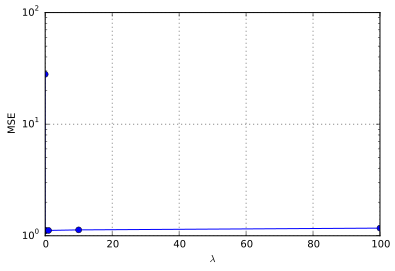

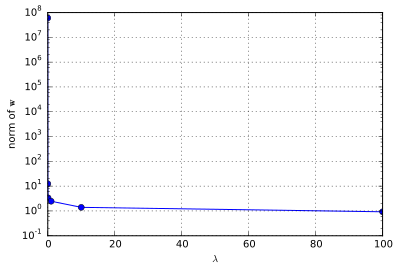

In [26]:
pl.figure()
pl.semilogy(lamb_list, MSE_list, '-o')
pl.xlabel('$\lambda$')
pl.ylabel('MSE')
pl.grid()    
pl.savefig('./figures/7f1.eps', format='eps', dpi=1000)   

pl.figure()
pl.semilogy(lamb_list, norm_list, '-o')
pl.xlabel('$\lambda$')
pl.ylabel('norm of $\mathbf{w}$')
pl.grid()
pl.savefig('./figures/7f2.eps', format='eps', dpi=1000)   

#### Test

MSE [learning]:  1.04197164446
MSE [test]:  1.11608842949


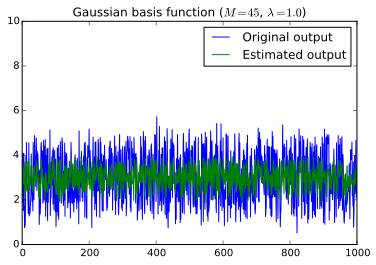

In [27]:
lamb = 1.0
M = 45

t_learning = x_learning_output
t_test = x_test_output

(y_learning, w_learning) = gausslearnreg(x_learning_input, t_learning, M, lamb)
(y_test, w_test) = gausslearnreg(x_test_input, t_test, M, lamb)

print 'MSE [learning]: ', mse(y_learning, t_learning)
print 'MSE [test]: ', mse(y_test, t_test)

pl.figure()
pl.plot(t_test)
pl.plot(y_test)
pl.legend(('Original output', 'Estimated output'))
pl.ylim([0, 10])
pl.title('Gaussian basis function ($M={}$, $\lambda={}$)'.format(M, lamb))
pl.savefig('./figures/7f3.eps', format='eps', dpi=1000)   


## Eighth exercise

In [28]:
x = np.loadtxt('03_Assignment_data/03_Assignment_data-D-input.txt')
t = np.loadtxt('03_Assignment_data/03_Assignment_data-D-output.txt')

# force col vec
x.shape = (x.size, 1) 
t.shape = (t.size, 1)

In [29]:
N = x.shape[0]         # number of samples
ones = np.ones((N,1))

Sig = np.concatenate((ones, x), axis=1)
print Sig

[[ 1.    -1.   ]
 [ 1.    -0.999]
 [ 1.    -0.998]
 ..., 
 [ 1.     0.998]
 [ 1.     0.999]
 [ 1.     1.   ]]


In [30]:
alpha = 2
beta = 25
M = 2

Sni = alpha*np.eye(M) + beta*np.dot(Sig.T,Sig)
Sn = np.linalg.inv(Sni)
mn = beta*np.dot(Sn, np.dot(Sig.T, t))

print mn
print Sig

[[-0.06587564]
 [ 0.4999401 ]]
[[ 1.    -1.   ]
 [ 1.    -0.999]
 [ 1.    -0.998]
 ..., 
 [ 1.     0.998]
 [ 1.     0.999]
 [ 1.     1.   ]]


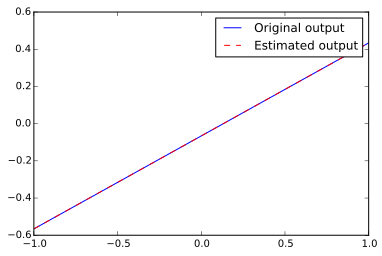

In [31]:
pl.figure()
pl.plot(x,t)
pl.plot(x, np.dot(Sig, mn),'--r')
pl.legend(('Original output', 'Estimated output'))
pl.savefig('./figures/8f1.eps', format='eps', dpi=1000)   